In [2]:
import pandas as pd

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [28]:
# Check the first few rows
print(train.head())

# Summary statistics
print(train.describe())

# Data types and missing values
print(train.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [29]:
# Check for missing values
print(train.isnull().sum())

# Fill missing values for 'Age' with the median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
train.drop(columns=['Cabin'], inplace=True)

# Verify no missing values
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [4]:
# Convert 'Sex' to numerical values
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


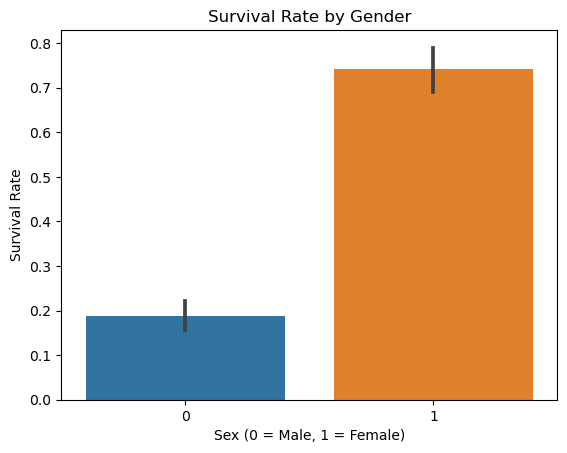

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()


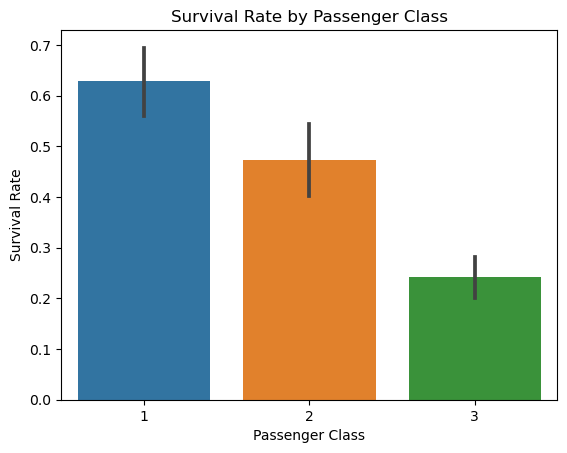

In [32]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


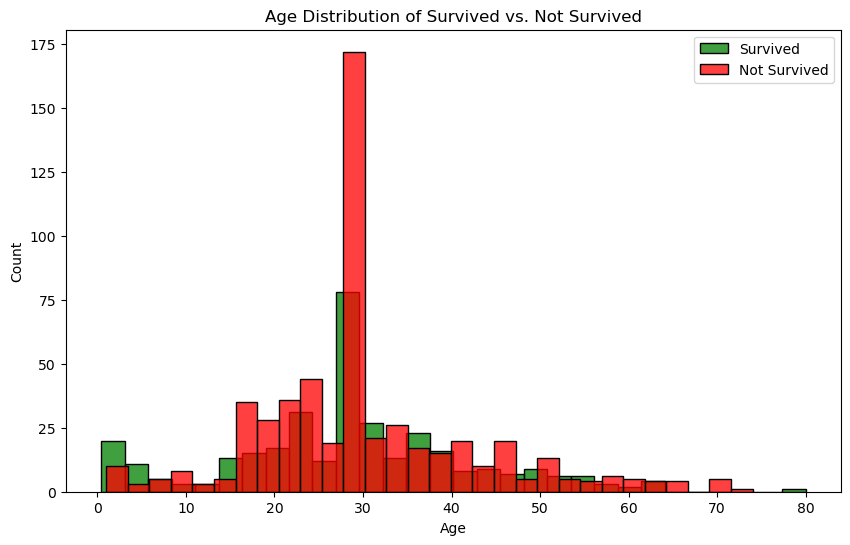

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(train[train['Survived'] == 1]['Age'], kde=False, bins=30, color='green', label='Survived')
sns.histplot(train[train['Survived'] == 0]['Age'], kde=False, bins=30, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution of Survived vs. Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


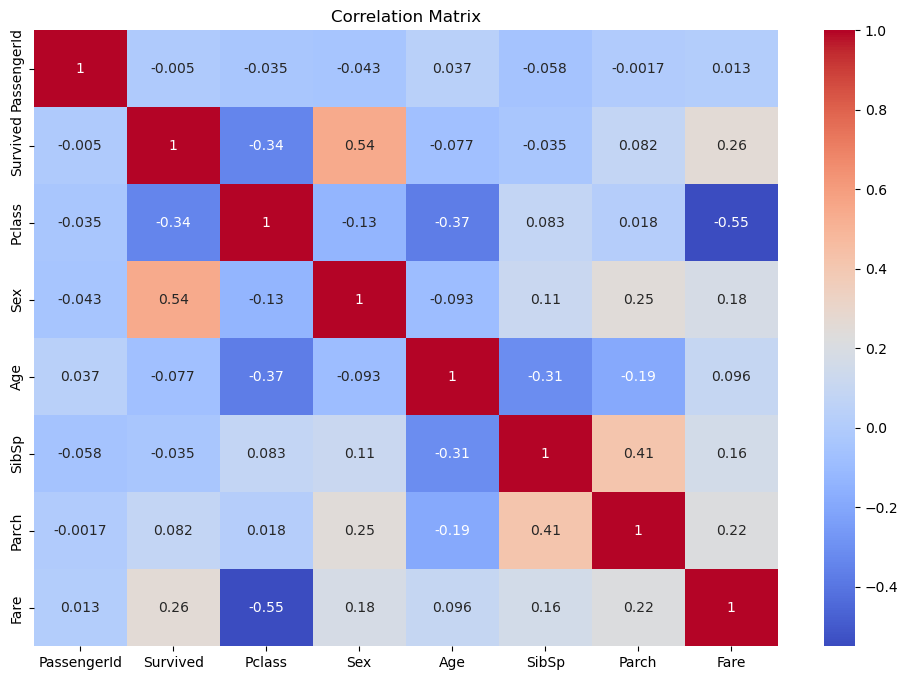

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train = pd.read_csv('train.csv')

# Convert 'Sex' to numerical values
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Fill missing values for 'Embarked' with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Convert 'Embarked' to dummy variables
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

# Select only numeric columns for correlation
numeric_cols = train.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = train[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
